# Завдання
* Зтворіть дві моделі - RNN та LSTM та порівняйте результати
* Додатково: як кількість кроків, на яку ми прогнозуємо, впливає на результат?

# Виконання

In [56]:
import pandas as pd
data = pd.read_csv('data/sales_data.csv',index_col=0)
data.index = pd.to_datetime(data.index)
data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)
data.index.name = 'Datetime'

print(f'Dataset size = {len(data)}')
data.head()

Dataset size = 72


,values
Datetime,
2015-01-01,30
2015-02-01,21
2015-03-01,29
2015-04-01,31
2015-05-01,40


<Axes: xlabel='Datetime'>

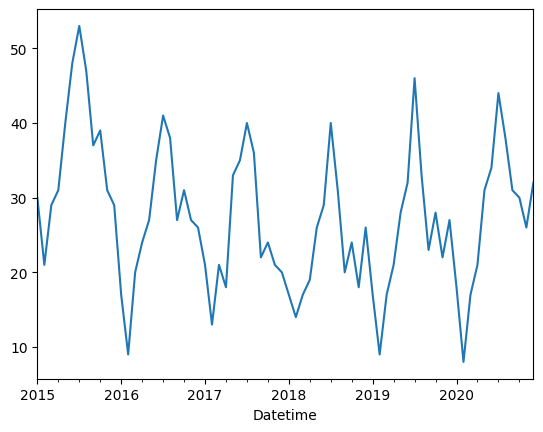

In [57]:
data['values'].plot()

In [58]:
import numpy as np

def create_sliding_windows(input_data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(input_data) - lookback - forecast_horizon + 1):
        X.append(input_data[i:i + lookback])
        y.append(input_data[i + lookback:i + lookback + forecast_horizon])

    return np.array(X), np.array(y)


def split_data(input_data_x, input_data_y, test_data_size):
    train_data_x, train_data_y = input_data_x[:-test_data_size + 1], input_data_y[:-test_data_size + 1]
    test_data_x, test_data_y = input_data_x[-test_data_size + 1:], input_data_y[-test_data_size + 1:]
    return train_data_x, train_data_y, test_data_x, test_data_y


test_set_size = 15
input_sliding_window_size = 3
output_sliding_window_size = 1

dataset_x, dataset_y = create_sliding_windows(data, input_sliding_window_size, output_sliding_window_size)
print('Dataset size =', len(dataset_x))

train_x, train_y, test_x, test_y = split_data(dataset_x, dataset_y, test_set_size)
print('Train size: X =', len(train_x), 'Y = ', len(train_y))
print('Test size: X =', len(test_x), 'Y = ', len(test_y))

print('Sample, X: ')
print(test_x)
print('Sample, Y: ')
print(test_y)

Dataset size = 69
Train size: X = 55 Y =  55
Test size: X = 14 Y =  14
Sample, X: 
[[[33]
  [23]
  [28]]

 [[23]
  [28]
  [22]]

 [[28]
  [22]
  [27]]

 [[22]
  [27]
  [18]]

 [[27]
  [18]
  [ 8]]

 [[18]
  [ 8]
  [17]]

 [[ 8]
  [17]
  [21]]

 [[17]
  [21]
  [31]]

 [[21]
  [31]
  [34]]

 [[31]
  [34]
  [44]]

 [[34]
  [44]
  [38]]

 [[44]
  [38]
  [31]]

 [[38]
  [31]
  [30]]

 [[31]
  [30]
  [26]]]
Sample, Y: 
[[[22]]

 [[27]]

 [[18]]

 [[ 8]]

 [[17]]

 [[21]]

 [[31]]

 [[34]]

 [[44]]

 [[38]]

 [[31]]

 [[30]]

 [[26]]

 [[32]]]
